In [1]:
import os, argparse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from collections import Counter
import text_utils

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

import fastai # pip install fastai
from fastai import *
from fastai.text import * 

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# nltk.download('stopwords')
# nltk.download('punkt')
stopwords = stopwords.words('english')

seed = 100
data_path = './data/'
models_dir = './models'


# Mobile

In [2]:
df = pd.read_csv(os.path.join(data_path, 'train_' + 'mobile_image' + '.csv'))

# Text cleaning
df['title'] = text_utils.clean_text(df['title'], stopwords)


train, val, _, _, _, _ = text_utils.data_split(df, seed)
df_trn = train[['Category', 'title']]
df_val = val[['Category', 'title']]

In [3]:
print("Train shape:",df_trn.shape)
print("Val shape:",df_val.shape)

Train shape: (128264, 2)
Val shape: (32066, 2)


In [4]:
# Language model data
data_lm = TextLMDataBunch.from_df(
    train_df = df_trn, valid_df = df_val, 
    path = "", bs=32
    ) # reduced bs from 64->32

In [ ]:
data_lm.train_ds.vocab_size

In [ ]:
data_lm.train_ds.vocab.itos

In [ ]:
data_lm.train_ds.labels

In [6]:
data_lm.show_batch()

idx,text
0,bl double ic protection xxbos samsung galaxy j pro xxbos chat aja wa kami hot sale beli gratis samsung galaxy plus dual sim gb black xxbos ramadhan sale xiaomi mi gb tam xxbos terlengkap blackberry passport silver edition dallas garansi resmi tam terlaris xxbos samsung galaxy plus gb handphone tablet original xxbos evercoss winner x xxbos note xxbos terbaru headset earphone apple iphone original xxbos brandcode b pro speaker spiker
1,glass uv light full glue lem xxbos ali boskuu samsung galaxy plus flip canvas denim slot card biru xxbos iphone plus silver gb ex inter xxbos iphone x gb unlocked sim free original bnib space grey xxbos oppo f new xxbos nokia x xxbos xiaomi note pro ram internal garansi resmi tam xxbos unik apple iphone gb gold gsm garansi distributor tahun berkualitas xxbos asus zenfone max pro xxbos terlaris
2,ram internal gb spesial ramadhan xxbos spesial promo beli gratis samsung galaxy ram gb internal gb garansi distributor free xxbos apple watch series sport mm xxbos big promo beli gratis samsung xxbos beli gratis chuwi hi plus keyboard docking case bnib xxbos redmi note ram gb memory gb xxbos slim black matte oppo f inchi soft anti glare sidik jari yy lsr xxbos htc ram gb gb brand new box
3,kam diskon murah meriah ready xxbos second oppo xxbos samsung new xxbos apple iphone x gb garansi distributor platinum xxbos kabel data xiaomi redmi mi note micro usb original ori cable xxbos new ipad air gb xxunk lte space grey inch retina display apple mini xxbos sale xiaomi redmi ram gb rom garansi resmi tam tahun beli gratis atau xxbos dijual lcd touchscreen sony xperia zr original c c limited
4,fhd silver buy get xxbos brand new iphone plus gb warna grey garansi internasional xxbos voice recorder sony icd px original perekam suara garansi resmi ori xxbos coolpad e xxbos vivo v gb red xxbos oppo f gb gb xxbos grosir asus zenfone max pro gb zb kl garansi resmi elegan xxbos cuci gudang skin garskin protector samsung galaxy plus black dragon xxbos promo cuci gudang nokia new grs resmi


In [5]:
learn = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=0.7) # AWD_LSTM requires cuda

/home/kwan/Downloads/shopee/venv/lib/python3.6/site-packages/fastai/datasets.py:159: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  with open(fpath, 'r') as yaml_file: return yaml.load(yaml_file)


In [7]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


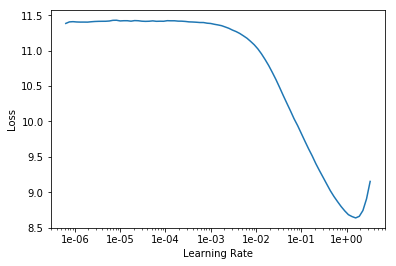

In [8]:
learn.recorder.plot()

https://docs.fast.ai/callbacks.one_cycle.html#What-is-1cycle?

In [9]:
learn.fit_one_cycle(1, 1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,4.143338,3.726688,0.320867,08:47
1,3.883408,3.459620,0.337921,08:35
2,3.590771,3.291130,0.353173,08:27


train_loss	valid_loss	accuracy
3.790121	3.480433	0.340201	08:37

In [10]:
learn.save_encoder('ft_enc_{}'.format('mobile_image'))

In [11]:
# test_df = pd.read_csv(os.path.join(data_path, 'test_mobile_image.csv'))
# df_test = test_df['title']

In [12]:
# Classifier model data
data_clas = TextClasDataBunch.from_df(
    path = "", train_df = df_trn, valid_df = df_val,
    text_cols = 0, label_cols = 1, vocab=data_lm.train_ds.vocab, bs=32
    ) # reduced bs from 64->32

In [13]:
data_clas.show_batch()

text,target
xxbos lg g se bnob ex garansi resmi h g se dualsim dual g gold bukan single sim inter v v g g,35
xxbos promo serba mrah beli gratis atau bele gratis xiaomi mi black tam resmi ram int gb,34
xxbos big promo beli gratis khusus hari ini saja stock terbatas oppo f ram gb rom gb,35
xxbos promo cuci gudang asus zenfone max pro zb kl black gb segel garansi resmi discount wa,35
xxbos beli gratis harga promo xiaomi xiomi biru blue redmi plus redmi plus resmi tam gb gb,34


In [14]:
learn = text_classifier_learner(data_clas, arch=AWD_LSTM, drop_mult=0.7)

/home/kwan/Downloads/shopee/venv/lib/python3.6/site-packages/fastai/datasets.py:159: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  with open(fpath, 'r') as yaml_file: return yaml.load(yaml_file)


In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


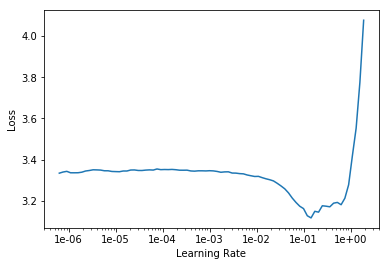

In [16]:
learn.recorder.plot()

In [17]:
learn.load_encoder('ft_enc_{}'.format('mobile_image'))

In [18]:
learn.fit_one_cycle(10, 5e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.732618,1.063261,0.720732,08:33
1,1.739810,1.095327,0.719641,08:49
2,1.930901,1.245110,0.697405,08:38
3,1.794390,1.222222,0.679598,08:49
4,1.792368,1.114798,0.707603,08:36
5,1.783302,1.117809,0.700742,08:42
6,1.705264,1.036152,0.736294,08:32
7,1.663287,1.037171,0.725285,08:36
8,1.577909,0.987372,0.740753,08:44
9,1.672641,0.977809,0.742282,08:30


1.545378	1.005613	0.752448

In [19]:
learn.save_encoder('ft_classifier_{}'.format('mobile_image'))

In [20]:
learn.show_results()

text,target,prediction
xxbos asus zenfone max zc kl gb gb black new segel bnib g u info order cara pemesanan chat via wa,35,35
xxbos minat chat aja lewat wa kami harga promo bli bonus unit new oppo f ram gb rom gb free ongkir,41,41
xxbos laptop xxunk p w k uhd x xxunk corei ram gb untuk info lebih lanjut chat via wa kami,35,35
xxbos gome k iris recognition gb ram gb rom helio p mtk ghz octa core inch fhd g lte,34,35
xxbos spesial promo di bulan januari sale cuci gudang new sony xperia z big second lte g ram gb,33,33


In [21]:
# get predictions
preds, targets = learn.get_preds()

predictions = np.argmax(preds, axis = 1)

In [22]:
# preds = learn.get_preds(ds_type=DatasetType.Train)

In [23]:
# output_csv_path = 'submission_mobile_image.csv'

# with open(output_csv_path, 'a') as f:
#     for i in range(len(preds)):
#         row = '{},{}\n'.format(test_df['itemid'][i],preds[i])
#         f.write(row)

# Beauty

In [24]:
df = pd.read_csv(os.path.join(data_path, 'train_' + 'beauty_image' + '.csv'))

# Text cleaning
df['title'] = text_utils.clean_text(df['title'], stopwords)


train, val, _, _, _, _ = text_utils.data_split(df, seed)
df_trn = train[['title', 'Category']]
df_val = val[['title', 'Category']]

In [25]:
print("Train shape:",df_trn.shape)
print("Val shape:",df_val.shape)

Train shape: (229266, 2)
Val shape: (57317, 2)


In [26]:
# Language model data
data_lm = TextLMDataBunch.from_df(
    train_df = df_trn, valid_df = df_val, 
    text_cols = 0, label_cols = 1, path = "", bs=32
    ) # reduced bs from 64->32

In [27]:
learn = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=0.7) # AWD_LSTM requires cuda

/home/kwan/Downloads/shopee/venv/lib/python3.6/site-packages/fastai/datasets.py:159: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  with open(fpath, 'r') as yaml_file: return yaml.load(yaml_file)


In [28]:
data_lm.show_batch()

idx,text
0,jerawat kemasan baru xxbos goji cream krim ajaib anti aging penuaan dini xxbos cream krem krim penumbuh alis xxbos inez satin smooth face powder xxbos beauty c acne spot gel kualitas ok xxbos wardah everyday bb cream natural ml xxbos nyx tango bronzer powder xxbos produk terbaik bedak padat matte glowing wajah tahan lama xxbos beautyful wardah exclusive two way cake spf xxbos moreskin acne xxbos bedak tabur ultima ii
1,powder xxbos nyx stay matte powder foundation xxbos exclusive bioaqua chamomile natural glycerin mask masker wajah xxbos wardah dd cream ml xxbos ponds bb powder xxbos xxunk compact powder g natural white bedak xxbos cuci gudang revlon touch glow extra moisturizing face powder g promo xxbos ready kuas makeup oval brush rose gold set pcs foundation powder soft bergaransi xxbos wet n wild highlighting powder crown canopy xxbos promo secret
2,xxbos nyx soft matte lip cream xxbos cream hn original pesenan xxunk xxbos essense stay natural consealor xxbos termurah dd cream fair n pink bpom dan original gr xxbos theraskin liquid foundation hi grade kl kn xxbos preloved wardah exclusive liquid foundation xxbos top cream b beautyrossa xxbos lancome cushion compact case le xxbos ponds angel face magic powder gram xxbos anti acne cream jerawat nasa xxbos new product ysl
3,xxbos sulwhasoo evenfair smoothing compact powder foundation xxbos giordani gold cc cream spf xxbos wardah white secret facial wash aha ml xxbos gratis ongkir allika store kosmetik focallure oil control matte smooth anti sweat xxbos catrice sun glow mineral bronzing powder golden light xxbos etude precious mineral bb cream perfect fit ori xxbos ekslusif refill laneige bb cushion whitening paling murah xxbos terbaik kuas natural bamboo pcs colour concealer cream
4,xxbos etude house zero sebum drying powder xxbos maybelline dream satin liquid foundation xxbos make face powder porcelain xxbos emina cheeklit cheek lit cream blush xxbos inez bedak refill twc precious powdery cake xxbos cc cream fair n pink original complete care xxbos bedak temulawak bpom v natural two way cake xxbos promo termurah colour kiss beauty highlight contour cream xxbos focallure bb cream foundation xxbos red jelly ms glow


In [29]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


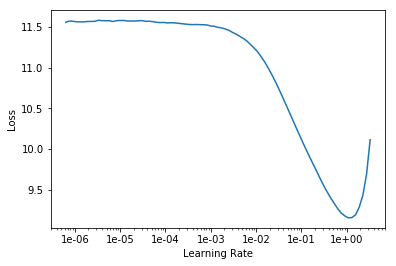

In [30]:
learn.recorder.plot()

https://docs.fast.ai/callbacks.one_cycle.html#What-is-1cycle?

In [31]:
learn.fit_one_cycle(1, 1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,4.831814,4.187471,0.320868,15:35
1,4.300907,3.763976,0.353816,15:35
2,3.907969,3.513801,0.376116,15:35


train_loss	valid_loss	accuracy
3.790121	3.480433	0.340201	08:37

In [32]:
learn.save_encoder('ft_enc_{}'.format('beauty_image'))

In [33]:
test_df = pd.read_csv(os.path.join(data_path, 'test_beauty_image.csv'))
df_test = test_df['title']

In [34]:
# Classifier model data
data_clas = TextClasDataBunch.from_df(
    path = "", train_df = df_trn, valid_df = df_val,
    text_cols = 0, label_cols = 1, vocab=data_lm.train_ds.vocab, bs=32
    ) # reduced bs from 64->32

In [35]:
data_clas.show_batch()

text,target
xxbos update sk ii u fsk u fskii atmosphere cc cream uv spf pa sachet u f gr murah flash,5
xxbos new product etude house precious mineral bb cream moist sand spf u fpa free ongkir,5
xxbos lighters men facial marine essence cleansing gel man oil control deep clean shrink pores ac,2
xxbos natural moisturize snail essence cream eye beauty skin care anti aging wrinkle remove dark circle,12
xxbos best promo face shop miracle finish bb power perfection cushion spf pa full garansi xxunk,3


In [36]:
learn = text_classifier_learner(data_clas, arch=AWD_LSTM, drop_mult=0.7)

/home/kwan/Downloads/shopee/venv/lib/python3.6/site-packages/fastai/datasets.py:159: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  with open(fpath, 'r') as yaml_file: return yaml.load(yaml_file)


In [37]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


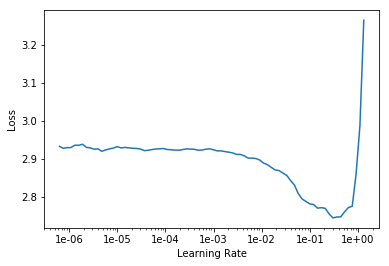

In [38]:
learn.recorder.plot()

In [39]:
learn.load_encoder('ft_enc_{}'.format('beauty_image'))

In [40]:
learn.fit_one_cycle(10, 5e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.801461,1.355622,0.565452,14:53
1,1.849829,1.454975,0.532739,14:38
2,1.906865,1.508999,0.516950,14:58
3,1.867757,1.484851,0.538025,14:53
4,1.888527,1.479846,0.537310,14:57
5,1.833802,1.429491,0.543573,14:45
6,1.754195,1.411898,0.545876,14:42
7,1.803522,1.336076,0.568662,15:00
8,1.740065,1.254288,0.611267,15:07
9,1.682523,1.241427,0.615472,14:39


1.545378	1.005613	0.752448

In [41]:
learn.save_encoder('ft_classifier_{}'.format('beauty_image'))

In [42]:
learn.show_results()

text,target,prediction
xxbos new product sk ii u fsk u fskii trial set fte rna power cream g anti aging free ongkir,4,4
xxbos buat apa kaya klw wajah dan kulit mu kusam skii sk crystal clear skin set xxunk xxunk kini ada,4,4
xxbos limited edition wet n wild mega glo dual ended contour stick light medium e big sale bulan ini,11,11
xxbos msi ion silver sbg pengganti p k praktis dn xxunk aman digunakan bayi org dewasa isi ml xxunk,4,4
xxbos big promo beli gratis sk ii sk skii loose powder uk g bedak tabur spf mohon cek info,4,3


In [43]:
# get predictions
preds, targets = learn.get_preds()

predictions = np.argmax(preds, axis = 1)

In [44]:
# preds = learn.get_preds(ds_type=DatasetType.Train)

In [45]:
# output_csv_path = 'submission_beauty_image.csv'

# with open(output_csv_path, 'a') as f:
#     for i in range(len(preds)):
#         row = '{},{}\n'.format(test_df['itemid'][i],preds[i])
#         f.write(row)

# Fashion

In [46]:
df = pd.read_csv(os.path.join(data_path, 'train_' + 'fashion_image' + '.csv'))

# Text cleaning
df['title'] = text_utils.clean_text(df['title'], stopwords)


train, val, _, _, _, _ = text_utils.data_split(df, seed)
df_trn = train[['title', 'Category']]
df_val = val[['title', 'Category']]

In [47]:
print("Train shape:",df_trn.shape)
print("Val shape:",df_val.shape)

Train shape: (175761, 2)
Val shape: (43941, 2)


In [48]:
# Language model data
data_lm = TextLMDataBunch.from_df(
    train_df = df_trn, valid_df = df_val, 
    text_cols = 0, label_cols = 1, path = "", bs=32
    ) # reduced bs from 64->32

In [49]:
learn = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=0.7) # AWD_LSTM requires cuda

/home/kwan/Downloads/shopee/venv/lib/python3.6/site-packages/fastai/datasets.py:159: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  with open(fpath, 'r') as yaml_file: return yaml.load(yaml_file)


In [50]:
data_lm.show_batch()

idx,text
0,panjang xxbos blue plaid layer shoulder top xxbos blus wanita sexy lengan panjang model high neck bahan mesh untuk musim semi gugur xxbos blus shoulder lengan panjang aksen pita slim fit untuk wanita xxbos baju kaos polos cotton bambo katun bambu warna hitam putih biru dll xxbos dress casual lengan pendek warna polos ada ukuran besar xxbos dress mini neck lengan panjang vintage warna polos untuk wanita xxbos dress selutut
1,blus putih polos wanita silk tosibo japan free ongkir xxbos fall winter turtleneck long sleeve knitted vintage dress rainbow stripes xxbos blus wanita lengan panjang dengan potongan longgar dan motif floral ukuran besar untuk musim semi xxbos zanzea blus retro vintage v neck lengan panjang hem asimetris motif print bunga xxbos branded brocade lined l sale premium dress party xxbos fashion women shirt skirt loose camouflage short sleeve clothes xxbos
2,neck casual loose long sleeve pocket shirt xxbos kaos shirt gaya retro versi korea print dinosaurus untuk musim panas xxbos kaos shirt lengan panjang motif print santa claus warna merah xxbos dress pensil lengan pendek square neck xxbos lisu dress lengan pendek bahan lace ada ukuran besar untuk wanita musim panas xxbos kaos ovneck polos basic tshirt santai spandek maroon pink navy benhur xxbos women fashion floral loose shawl kimono
3,chic elastis v neck untuk musim panas xxbos tank top kamisol sexy tanpa lengan untuk musim panas xxbos baru v neck mengacak acak kata kerah bahu tipis warna beludru gaun perempuan xxbos hofuna house manset atasan bigsize kaos dalaman lengan panjang polos xxbos promo hot new okechuku tunik sephia basic polos simpel elegan fashion wanita korea putih xxbos finejo women batwing chiffon blouse tops shirt short sleeve asymmetrical hem back
4,terbaru baloteli maron polos marun dress muslim baju mewah pesta premium xxbos gaun wanita model backless dan shoulder dengan bahan sifon bergaya bohemian elegan xxbos sweater kaos casual neck lengan panjang motif print natal untuk wanita xxbos dress midi model cheongsam motif bordir bahan lace untuk pesta pernikahan malam xxbos promo dress brukat brokat party lace xxbos promo polo shirt cewek wanita lengan panjang kaos xxbos cvpreorder termurah women tops


In [51]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


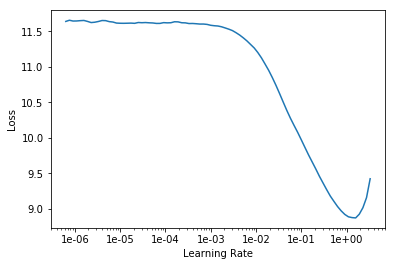

In [52]:
learn.recorder.plot()

https://docs.fast.ai/callbacks.one_cycle.html#What-is-1cycle?

In [53]:
learn.fit_one_cycle(1, 1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,4.303290,3.842963,0.302949,17:58
1,4.029491,3.607052,0.319115,17:58
2,3.760323,3.424852,0.337262,17:58


train_loss	valid_loss	accuracy
3.790121	3.480433	0.340201	08:37

In [54]:
learn.save_encoder('ft_enc_{}'.format('fashion_image'))

In [55]:
test_df = pd.read_csv(os.path.join(data_path, 'test_fashion_image.csv'))
df_test = test_df['title']

In [56]:
# Classifier model data
data_clas = TextClasDataBunch.from_df(
    path = "", train_df = df_trn, valid_df = df_val,
    text_cols = 0, label_cols = 1, vocab=data_lm.train_ds.vocab, bs=32
    ) # reduced bs from 64->32

In [57]:
data_clas.show_batch()

text,target
xxbos batik jumbo couple p l xl xxl xxxl xxrep 4 x l xxrep 5 x l hem sampai ld cm blus,30
xxbos atasan kaos polos besar big size xxl xxrep 4 x l lengan panjang katun putih l fashion wanita jne,25
xxbos blouse atasan wanita basic polos baby blue jumbo xxl xl bigsize melar bordir adem big plus murah hq,26
xxbos xxunk new gaun mini wanita dengan bahan denim dan warna biru untuk pesta malam pantai musim panas,19
xxbos dress mini wanita lengan flare model longgar v neck warna polos ada ukuran besar untuk musim panas,18


In [58]:
learn = text_classifier_learner(data_clas, arch=AWD_LSTM, drop_mult=0.7)

/home/kwan/Downloads/shopee/venv/lib/python3.6/site-packages/fastai/datasets.py:159: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  with open(fpath, 'r') as yaml_file: return yaml.load(yaml_file)


In [59]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


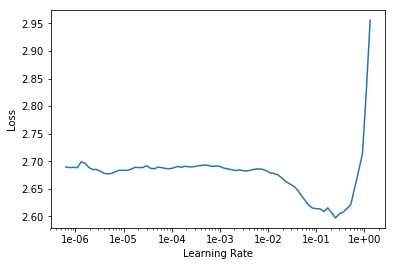

In [60]:
learn.recorder.plot()

In [61]:
learn.load_encoder('ft_enc_{}'.format('fashion_image'))

In [62]:
learn.fit_one_cycle(10, 5e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.033192,1.752983,0.416012,13:46
1,2.093323,1.909557,0.344371,14:02
2,2.098343,1.947514,0.336042,14:02
3,2.097873,1.924262,0.376118,13:55
4,2.054305,1.814544,0.413509,13:55
5,2.053373,1.841575,0.380874,13:49
6,2.025445,1.761018,0.426526,13:51
7,2.021170,1.697072,0.462416,13:55
8,1.945207,1.633792,0.471450,15:12
9,1.935969,1.621715,0.477640,14:54


1.545378	1.005613	0.752448

In [63]:
learn.save_encoder('ft_classifier_{}'.format('fashion_image'))

In [64]:
learn.show_results()

text,target,prediction
xxbos big xxrep 5 x l xxrep 6 x l ay long kemeja bigsize r baju basic kantor wanita xxunk skoder xl polos,27,26
xxbos tk tunik super bigsize long blouse basic jumbo xxrep 4 x l r lengan panjang baju wanita muslim murah kj,30,26
xxbos e lq dress babol red fox katun kotak asli merah hitam square xl big size jumbo besar sabrina sexy,26,18
xxbos banting harga semua warna kemeja basic oversize shirt fit l xxrep 5 x l kantor polos super jumbo bigsize,30,26
xxbos ds super bigsize long blouse rayon xxrep 4 x l r baju jumbo polos lengan panjang wanita muslim tunik,26,26


In [65]:
# get predictions
preds, targets = learn.get_preds()

predictions = np.argmax(preds, axis = 1)

KeyboardInterrupt: 

In [ ]:
# preds = learn.get_preds(ds_type=DatasetType.Train)

In [ ]:
# output_csv_path = 'submission_beauty_image.csv'

# with open(output_csv_path, 'a') as f:
#     for i in range(len(preds)):
#         row = '{},{}\n'.format(test_df['itemid'][i],preds[i])
#         f.write(row)